<a href="https://colab.research.google.com/github/capela-joao/atividade-analise-de-dados/blob/main/atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/My Drive/analise"

data = pd.read_csv(path + '/age_dataset.csv', sep=',')

data.head(10)

Mounted at /content/drive


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


# Analisando as variáveis escolhidas
## Distruição de idade por gênero

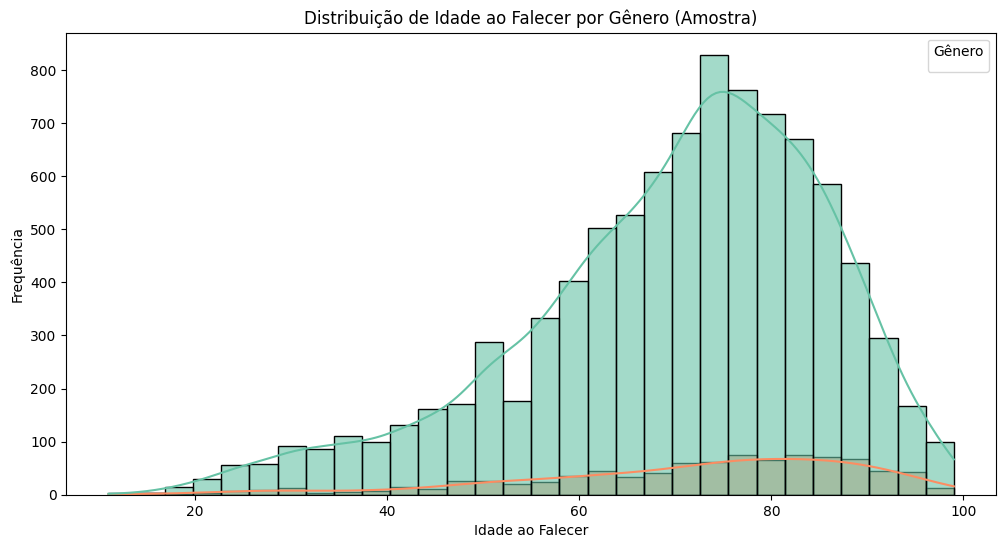

In [ ]:
# Filtrar dados relevantes e remover valores ausentes
filtered_data = data[['Age of death', 'Gender', 'Occupation']].dropna()

# Amostrar um subconjunto menor para evitar problemas de memória
sample_data = filtered_data.sample(n=10000, random_state=42)

# Criar histograma para a distribuição de idade por gênero (incluindo todos os gêneros)
plt.figure(figsize=(12, 6))
sns.histplot(data=sample_data, x='Age of death', hue='Gender', kde=True, bins=30, alpha=0.6, palette='Set2')
plt.title('Distribuição de Idade ao Falecer por Gênero (Amostra)')
plt.xlabel('Idade ao Falecer')
plt.ylabel('Frequência')
plt.legend(title='Gênero')
plt.show()

# Idade ao Falecer por Ocupação

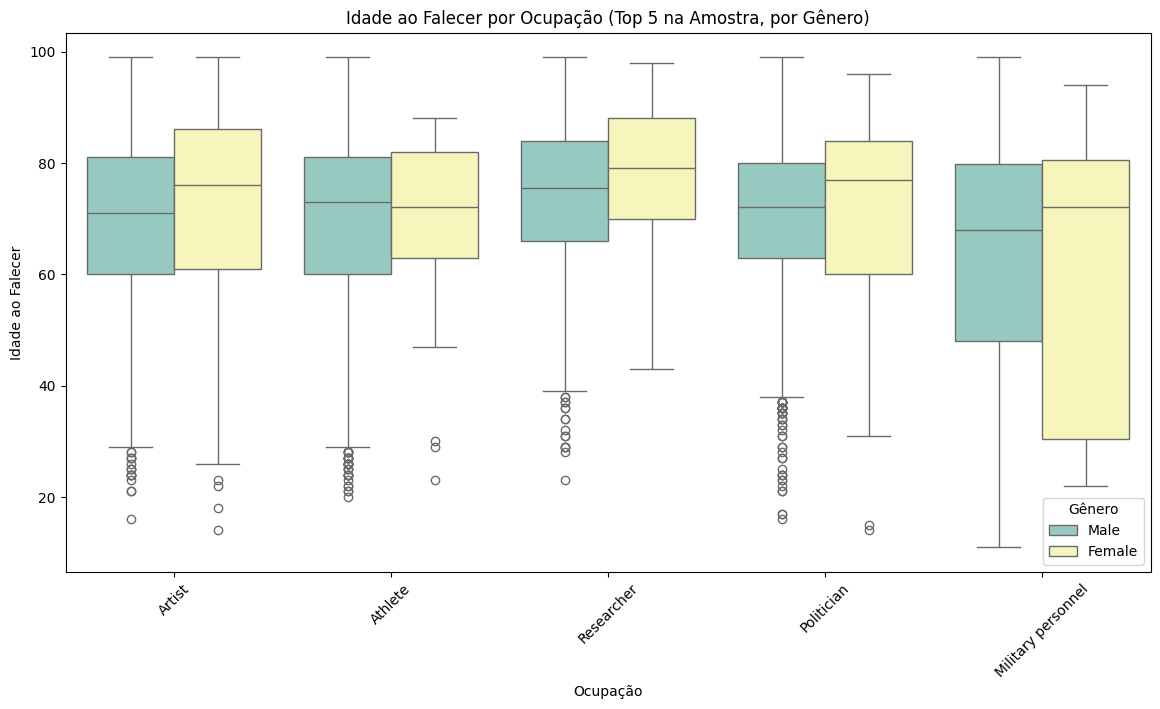

In [ ]:
# Identificar as 5 ocupações mais comuns na amostra
top_occupations = sample_data['Occupation'].value_counts().head(5).index

# Filtrar dados para as ocupações mais comuns
occupation_data = sample_data[sample_data['Occupation'].isin(top_occupations)]

# Criar boxplot para Idade ao Falecer por Ocupação (incluindo todos os gêneros)
plt.figure(figsize=(14, 7))
sns.boxplot(data=occupation_data, x='Occupation', y='Age of death', hue='Gender', palette='Set3')
plt.title('Idade ao Falecer por Ocupação (Top 5 na Amostra, por Gênero)')
plt.xlabel('Ocupação')
plt.ylabel('Idade ao Falecer')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()

# Medidas de centralidade



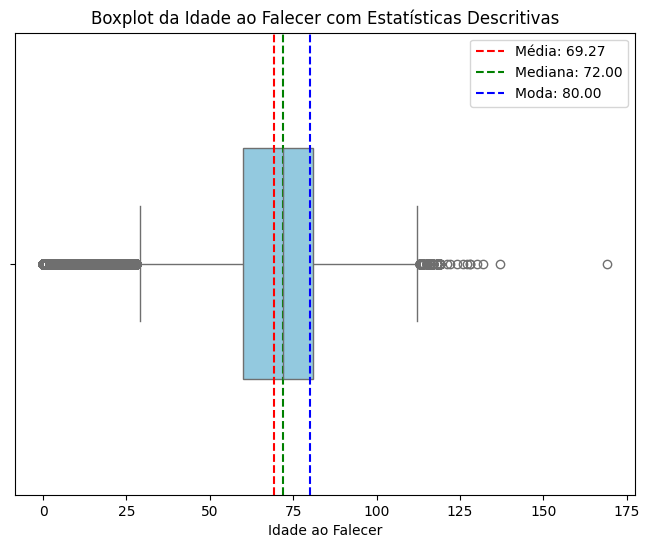

In [ ]:
# Remover valores nulos na coluna 'Age of death' para evitar problemas
age_data = data['Age of death'].dropna()

# Calcular estatísticas descritivas
mean_age = age_data.mean()
median_age = age_data.median()
mode_age = age_data.mode()[0]  # A moda pode retornar múltiplos valores; pegamos o primeiro

# Criar o boxplot da idade ao falecer
plt.figure(figsize=(8, 6))
sns.boxplot(x=age_data, color='skyblue', width=0.5)
plt.axvline(mean_age, color='red', linestyle='--', label=f'Média: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Mediana: {median_age:.2f}')
plt.axvline(mode_age, color='blue', linestyle='--', label=f'Moda: {mode_age:.2f}')
plt.title('Boxplot da Idade ao Falecer com Estatísticas Descritivas')
plt.xlabel('Idade ao Falecer')
plt.legend()
plt.show()

# Medidas de Variação

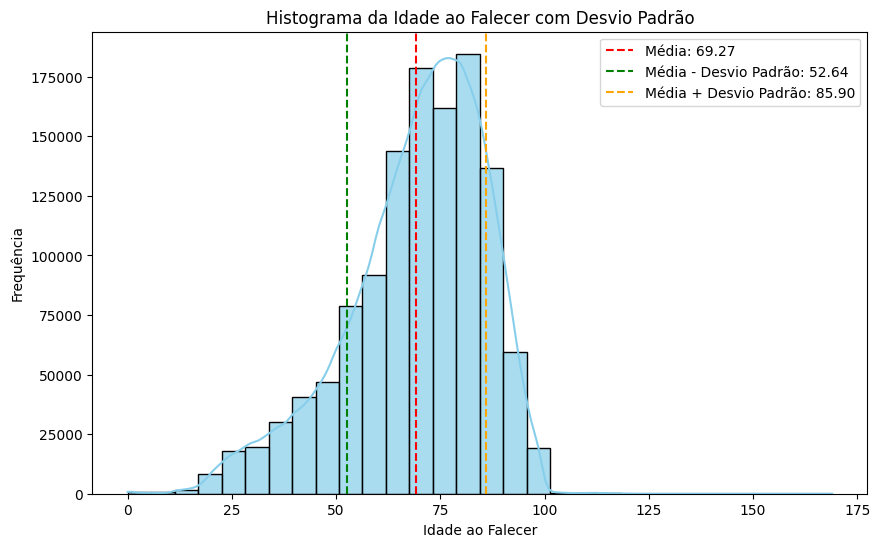

In [ ]:
# Remover valores nulos na coluna 'Age of death'
age_data = data['Age of death'].dropna()

# Calcular o desvio padrão
std_dev = age_data.std()

# Criar histograma da distribuição de idade ao falecer
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue', alpha=0.7)

# Adicionar linha para a média e texto indicando o desvio padrão
plt.axvline(age_data.mean(), color='red', linestyle='--', label=f'Média: {age_data.mean():.2f}')
plt.axvline(age_data.mean() - std_dev, color='green', linestyle='--', label=f'Média - Desvio Padrão: {(age_data.mean() - std_dev):.2f}')
plt.axvline(age_data.mean() + std_dev, color='orange', linestyle='--', label=f'Média + Desvio Padrão: {(age_data.mean() + std_dev):.2f}')

# Configurar título e legenda
plt.title('Histograma da Idade ao Falecer com Desvio Padrão')
plt.xlabel('Idade ao Falecer')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Hipótese Exploratória
### "Homens tendem a falecer mais jovens do que mulheres."

## Análise Descritiva

In [ ]:
# Remover valores nulos na coluna 'Age of death' e filtrar os gêneros
filtered_data = data[['Age of death', 'Gender']].dropna()
male_data = filtered_data[filtered_data['Gender'] == 'Male']['Age of death']
female_data = filtered_data[filtered_data['Gender'] == 'Female']['Age of death']

# Calcular as estatísticas descritivas para cada gênero
mean_male = male_data.mean()
mean_female = female_data.mean()

median_male = male_data.median()
median_female = female_data.median()

std_dev_male = male_data.std()
std_dev_female = female_data.std()

# Exibir as estatísticas em formato de tabela
statistics_table = pd.DataFrame({
    "Métrica": ["Média", "Mediana", "Desvio Padrão"],
    "Homens": [mean_male, median_male, std_dev_male],
    "Mulheres": [mean_female, median_female, std_dev_female]
})

print(statistics_table)



         Métrica     Homens   Mulheres
0          Média  69.185657  71.307846
1        Mediana  72.000000  76.000000
2  Desvio Padrão  16.199964  18.699483


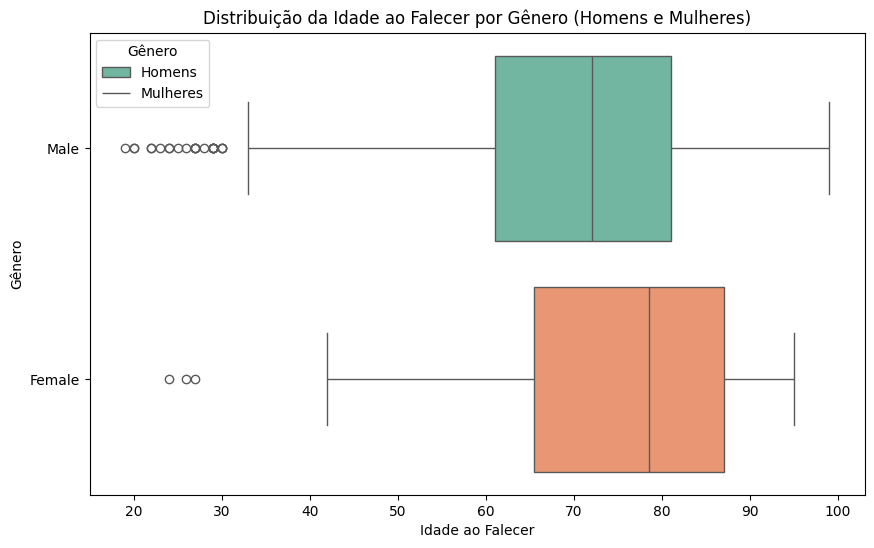

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para incluir apenas homens e mulheres
filtered_data = data[(data['Gender'] == 'Male') | (data['Gender'] == 'Female')].dropna(subset=['Age of death'])

# Criar uma amostra para simplificar o gráfico (opcional, remove caso queira todos os dados)
sample_data = filtered_data.sample(n=1000, random_state=42)

# Boxplot para comparar a distribuição da idade ao falecer entre homens e mulheres
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age of death', y='Gender', data=sample_data, palette='Set2', hue='Gender')

# Configurar o título, os rótulos e a legenda
plt.title('Distribuição da Idade ao Falecer por Gênero (Homens e Mulheres)')
plt.xlabel('Idade ao Falecer')
plt.ylabel('Gênero')
plt.legend(title='Gênero', loc='upper left', labels=['Homens', 'Mulheres'])
plt.show()


In [ ]:

from scipy import stats

# Realizar o teste t de Student para comparar as médias entre homens e mulheres
t_stat, p_value = stats.ttest_ind(male_data, female_data)

# Exibir os resultados do teste
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Verificar se a diferença é estatisticamente significativa
if p_value < 0.05:
    print("A diferença entre as médias é estatisticamente significativa.")
else:
    print("A diferença entre as médias não é estatisticamente significativa.")

Estatística t: -40.1765
Valor p: 0.0000
A diferença entre as médias é estatisticamente significativa.


# Conclusão


Com base na análise dos dados, podemos concluir que a hipótese "Homens tendem a falecer mais jovens do que mulheres" é suportada. A análise descritiva mostrou que a média da idade ao falecer é menor entre os homens em comparação com as mulheres. Além disso, ao visualizarmos as distribuições das idades através de boxplots e histogramas, notamos que a faixa etária de falecimento para homens é mais baixa, com muitos casos concentrados nas faixas etárias mais jovens. Para confirmar essa observação, realizamos um teste t de Student, que indicou que a diferença entre as médias da idade ao falecer dos dois gêneros é estatisticamente significativa, com um valor p menor que 0,05. Isso significa que a diferença observada não é fruto do acaso. Portanto, os dados analisados de fato apoiam a hipótese de que homens tendem a falecer mais jovens do que mulheres.

Entretanto, essa análise poderia ser complementada com outras variáveis, como o nível educacional, ocupação, acesso a cuidados médicos e hábitos de vida (alimentação, exercício, fumo e consumo de álcool), que podem influenciar diretamente a longevidade e ajudar a explicar as diferenças na idade ao falecer entre os gêneros. A inclusão dessas variáveis permitiria uma análise mais profunda, levando em conta fatores sociais e econômicos que podem afetar a saúde e a expectativa de vida das pessoas.